# **Credit Card Transactions Fraud Detection Using K-Nearest  Neighbours (KNN)**


#### **In this the KNN algorithm is applied on the credit card transactions fraud detection dataset.**
##### **dataset: https://www.kaggle.com/datasets/kartik2112/fraud-detection?datasetId=817870&searchQuery=svm**

## **Importing the libraries**

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# visual libraries
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')

# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
import sklearn.externals as extjoblib
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# Load the train dataset into a Pandas DataFrame
train_df = pd.read_csv('C:/Users/himashara/Downloads/archive/fraudTrain.csv')

## **Visualising the data**

In [3]:
# Display the first few rows of the dataset
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## **Pre-Processing the data**

##### **UNDERSAMPLING**

In [5]:
# Drop unnecessary columns
train_df = train_df.drop('Unnamed: 0', axis=1)  # Drop the 'Unnamed: 0' column as it seems to be an unnecessary index

# Convert date columns to datetime format
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
train_df['dob'] = pd.to_datetime(train_df['dob'])

# Extract features from date columns
train_df['trans_year'] = train_df['trans_date_trans_time'].dt.year
train_df['trans_month'] = train_df['trans_date_trans_time'].dt.month
train_df['trans_day'] = train_df['trans_date_trans_time'].dt.day
train_df['trans_hour'] = train_df['trans_date_trans_time'].dt.hour
train_df['dob_year'] = train_df['dob'].dt.year
train_df['dob_month'] = train_df['dob'].dt.month
train_df['dob_day'] = train_df['dob'].dt.day

# Drop the original date columns
train_df = train_df.drop(['trans_date_trans_time', 'dob'], axis=1)

# Convert categorical columns to numerical using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['merchant'] = label_encoder.fit_transform(train_df['merchant'])
train_df['category'] = label_encoder.fit_transform(train_df['category'])
train_df['gender'] = label_encoder.fit_transform(train_df['gender'])
train_df['first'] = label_encoder.fit_transform(train_df['first'])
train_df['last'] = label_encoder.fit_transform(train_df['last'])
train_df['street'] = label_encoder.fit_transform(train_df['street'])
train_df['city'] = label_encoder.fit_transform(train_df['city'])
train_df['state'] = label_encoder.fit_transform(train_df['state'])
train_df['job'] = label_encoder.fit_transform(train_df['job'])
train_df['trans_num'] = label_encoder.fit_transform(train_df['trans_num'])

# Normalize numerical columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']] = scaler.fit_transform(train_df[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']])

# Display the first few rows of the preprocessed dataset
train_df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_hour,dob_year,dob_month,dob_day
0,2703186189652095,514,8,0.000137,162,18,0,568,526,27,...,0.350302,0.848602,0,2019,1,1,0,1988,3,9
1,630423337322,241,4,0.003670,309,157,0,435,612,47,...,0.621488,0.486208,0,2019,1,1,0,1978,6,21
2,38859492057661,390,0,0.007569,115,381,1,602,468,13,...,0.497559,0.546697,0,2019,1,1,0,1962,1,19
3,3534093764340240,360,2,0.001520,163,463,1,930,84,26,...,0.577663,0.542619,0,2019,1,1,0,1967,1,12
4,375534208663984,297,9,0.001415,336,149,1,418,216,45,...,0.405244,0.882857,0,2019,1,1,0,1986,3,28


In [6]:
# Limit the usage of data rows to 100000 because of slowness of data processing.
train_df = train_df.head(100000)

# Save the preprocessed dataset to a CSV file
train_df.to_csv('C:/Users/himashara/Downloads/archive/preprocessed_fraudTrain.csv', index=False)

In [7]:
# Encode categorical columns
le = LabelEncoder()
train_df['job'] = le.fit_transform(train_df['job'])
train_df['state'] = le.fit_transform(train_df['state'])

# Split the dataset into features (X) and target (y)
X = train_df.drop(['is_fraud'], axis=1)
y = train_df['is_fraud']

# splitting the faeture array and label array keeping 80% for the trainnig sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# normalize: Scale input vectors individually to unit norm (vector length).
X_train = normalize(X_train)
X_test=normalize(X_test)


In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# For the model building I am using K Nearest Neighbors. So we need find an optimal K to get the best out of it.
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    #Fit the model
    knn.fit(X_train,y_train.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test.ravel()) 

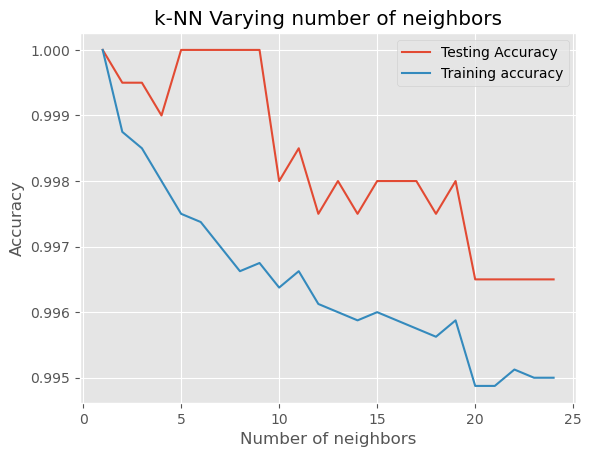

In [9]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [10]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [11]:
#k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=1)

In [12]:
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(knn, filename)

['finalized_model.sav']

In [13]:
# load the model from disk
knn = joblib.load(filename)

In [14]:
# predicting labels for testing set
knn_predicted_test_labels=knn.predict(X_test)

Text(0.5, 1.0, ' Number of Blobs')

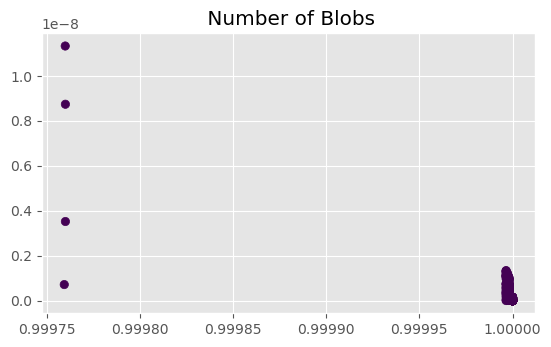

In [15]:
from pylab import rcParams

#plt.figure(figsize=(12, 12))
rcParams['figure.figsize'] = 14, 8
plt.subplot(222)
plt.scatter(X_test[:, 0], X_test[:, 1], c=knn_predicted_test_labels)
plt.title(" Number of Blobs")

In [16]:
#scoring knn
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(y_test,knn_predicted_test_labels)
knn_MCC             = matthews_corrcoef(y_test,knn_predicted_test_labels)

In [17]:
#printing
print("")
print("------------ K-Nearest Neighbours ------------")
print("Scores \n")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)
print("MCC -->",knn_MCC) # Matthews Correlation Coefficient is a measure of the quality of binary classifications, taking into account true and false positives and negatives.

print("\n------------------- Report -------------------\n")
print(classification_report(y_test,knn_predicted_test_labels))


------------ K-Nearest Neighbours ------------
Scores 

Accuracy --> 1.0
Precison --> 1.0
Recall --> 1.0
F1 --> 1.0
MCC --> 1.0

------------------- Report -------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1993
           1       1.00      1.00      1.00         7

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



### Confusion Matrix

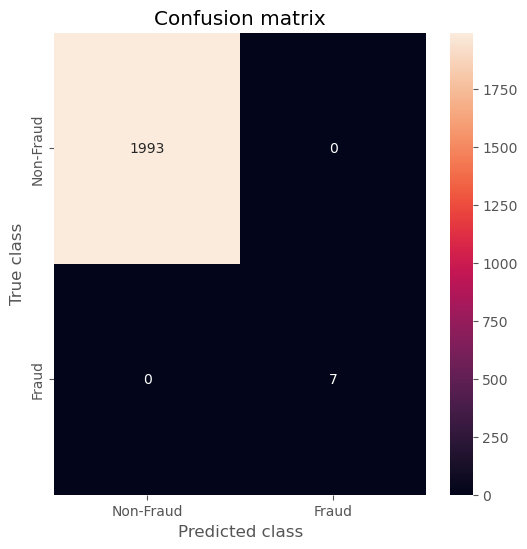

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
import seaborn as sns

LABELS = ['Non-Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, knn_predicted_test_labels)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#  **KNN Graphical Representation**

###  **Graphical KNN representation 1 - Heatmap**

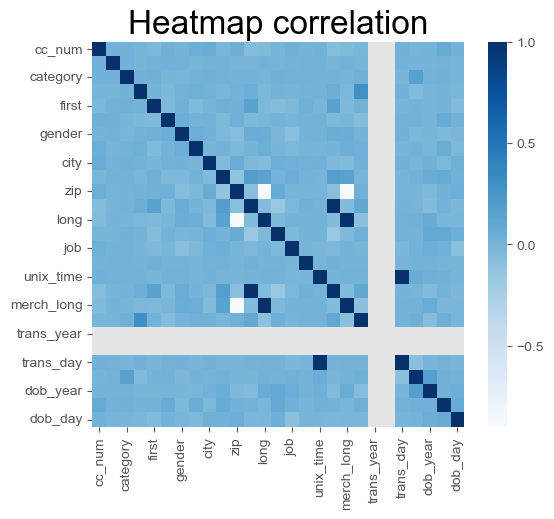

In [19]:
import seaborn as sns

correlation_matrix = train_df.corr()

fig = plt.figure(figsize=(6,5))
# sns.heatmap(correlation_matrix,vmax=0.8,square = True)
# plt.show()

sns.heatmap(correlation_matrix, cmap='Blues') 
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

### **Graphical KNN representation 2 - Decision Boundary**


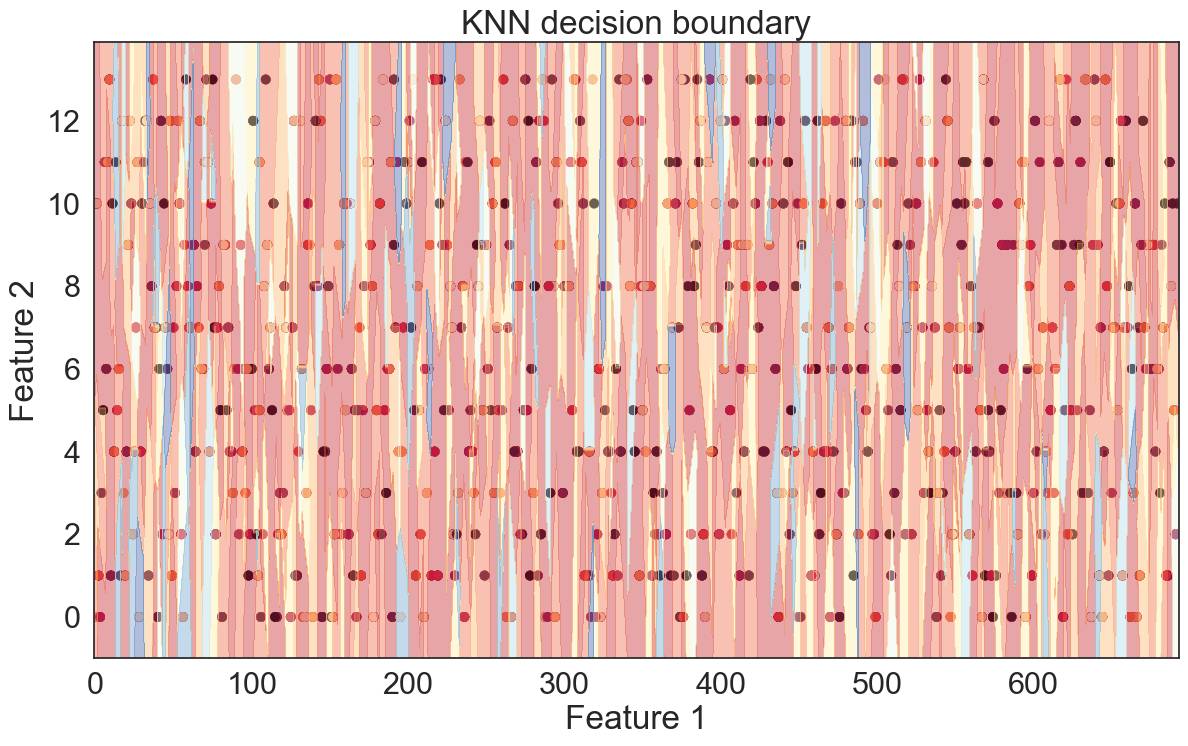

In [20]:
import matplotlib.pyplot as plt

# Select the first two features and the target variable
X = train_df.iloc[:, [1, 2]].values
y = train_df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Define the boundaries of the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid of points to evaluate the classifier
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class of each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the decision boundary of the KNN classifier
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.title('KNN decision boundary')
plt.show()

### **Graphical KNN representation 3 - Voronoi diagram**

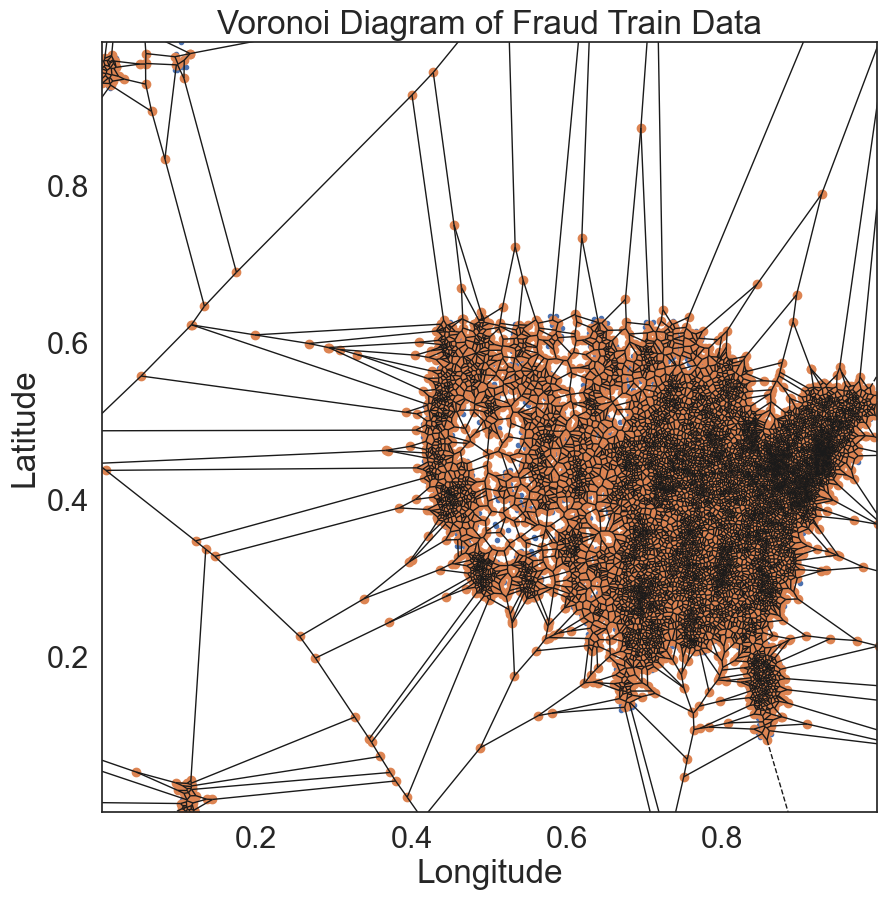

In [21]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Extract the x and y coordinates from the DataFrame
points = train_df[['merch_long', 'merch_lat']].values

# Compute the Voronoi diagram
vor = Voronoi(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots(figsize=(10, 10))
voronoi_plot_2d(vor, ax=ax)

# Set the axis limits
ax.set_xlim(train_df['merch_long'].min(), train_df['merch_long'].max())
ax.set_ylim(train_df['merch_lat'].min(), train_df['merch_lat'].max())

# Add a title and labels for the axes
ax.set_title('Voronoi Diagram of Fraud Train Data')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the plot
plt.show()
